<a href="https://colab.research.google.com/github/RobinCross/RobinCross/blob/main/Laser_COT_Time_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the aesthetic medical industry Pulsed-Dye Lasers are commonly used for the treatment of various skin conditions. The dyed fluid within the lasers is a yellow-orange hue that is made of a Dye compound mixed with a COT compound. The combination of these two fluids allows for the laser to reach both the desired wavelength 590-595nm and the desired power output (1-15 J/cm^2). After extended use the mixture of Dye and COT loses strength and instensity and needs to be changed out by Field Service Engineers. The engineers remove the old fluid from the machine (they can only remove about 70% during a normal service call), and replace it with clear fluid, COT and a dye cartridge that the COT reacts with the create the inteded fluid color and power.

For this project I'm creating an ML model that predicts how much COT time will need to be reach the desired Wavelength and Energy

First I create a fake dataset to train my model on. I create a function called calculate_cot_time that takes my best guess for the influence of each feature on the target variable.


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set a random seed for reproducibility
np.random.seed(42)

# Manufacturing dates for new COT and Dye (within the last 3 months)
new_cot_manufacturing_dates = [datetime.now() - timedelta(days=np.random.randint(0, 90)) for _ in range(1000)]
new_dye_manufacturing_dates = [datetime.now() - timedelta(days=np.random.randint(0, 90)) for _ in range(1000)]

# Installation dates (0-30 days after manufacturing)
new_cot_installation_dates = [date + timedelta(days=np.random.randint(0, 30)) for date in new_cot_manufacturing_dates]
new_dye_installation_dates = [date + timedelta(days=np.random.randint(0, 30)) for date in new_dye_manufacturing_dates]

# Age of new COT and Dye (in days)
new_cot_age = np.array([(datetime.now() - date).days for date in new_cot_manufacturing_dates])
new_dye_age = np.array([(datetime.now() - date).days for date in new_dye_manufacturing_dates])

# Random age of the old COT and Dye in the system (30-180 days)
old_cot_age = np.random.randint(30, 180, size=1000)
old_dye_age = np.random.randint(30, 180, size=1000)

# Random number of pulses on the old dye (10,000 - 1,000,000)
old_dye_pulses = np.random.randint(10000, 1000000, size=1000)

# Random number of fluid left in COT bottle (0mL - 100mL)
old_cot_left = (165 - (np.random.randint(0,100,size=1000)))


# Calculate COT time based on the features
import numpy as np

import numpy as np

def calculate_cot_time(new_cot_age, new_dye_age, old_cot_age, old_dye_age, old_dye_pulses, old_cot_left):
    (0.3 * (new_cot_age / 30) + 0.2 * (new_dye_age / 30) + 0.2 * (old_cot_age / 30) + 0.1 * (old_dye_age / 30) +
                0.1 * (old_dye_pulses / 100000) + 0.15 * (old_cot_left / 100))

# Calculate COT time
cot_time =  calculate_cot_time(new_cot_age, new_dye_age, old_cot_age, old_dye_age, old_dye_pulses, old_cot_left)
#cot_time = np.random.randint(40,60,size=1000)
# Create a DataFrame with the generated data
data = pd.DataFrame({
    'New_COT_Manufacturing_Date': new_cot_manufacturing_dates,
    'New_COT_Installation_Date': new_cot_installation_dates,
    'New_COT_Age': new_cot_age,
    'New_Dye_Manufacturing_Date': new_dye_manufacturing_dates,
    'New_Dye_Installation_Date': new_dye_installation_dates,
    'New_Dye_Age': new_dye_age,
    'Old_COT_Age': old_cot_age,
    'Old_Dye_Age': old_dye_age,
    'Old_Dye_Pulses': old_dye_pulses,
    'Old_COT_Left': old_cot_left,
    'COT_Time': cot_time,

})

# Save the DataFrame to a CSV file
data.to_csv('laser_dye_data_with_cot.csv', index=False)

In [137]:
# Wrangle Function
df = pd.read_csv('laser_dye_data_with_cot.csv')
df = df.drop(columns=['New_COT_Manufacturing_Date','New_COT_Installation_Date','New_Dye_Manufacturing_Date', 'New_Dye_Installation_Date'])

In [138]:
df.head()

,New_COT_Age,New_Dye_Age,Old_COT_Age,Old_Dye_Age,Old_Dye_Pulses,Old_COT_Left,COT_Time
0,51,10,172,160,366778,110,NaN
1,14,13,111,50,259106,148,NaN
2,71,59,121,93,445647,112,NaN
3,60,29,33,119,502461,89,NaN
4,20,34,164,65,896643,123,NaN


In [130]:
target = df['COT_Time']

X = df.drop(['COT_Time'], axis=1)

y = target

In [131]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [132]:
model_lr = LinearRegression().fit(X_train,y_train)


In [133]:
y_pred = model_lr.predict(X_val)

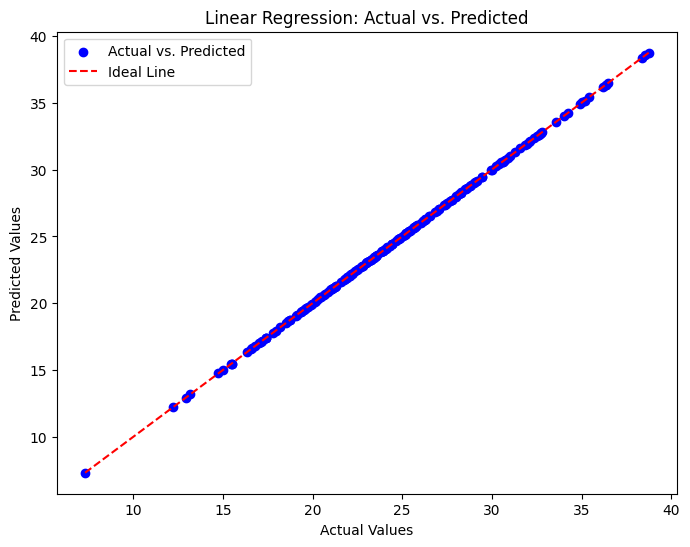

In [134]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

if len(X.columns) == 1:
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.xlabel('Independent Variable')
    plt.ylabel('Dependent Variable')
    plt.title('Linear Regression: Regression Line')
    plt.legend()
    plt.show()

ValueError: Unknown label type: 'continuous'